#### Importing the Dependancies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

#### The 1D function chosen for this implementation

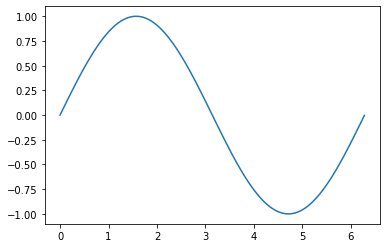

In [2]:
x = np.arange(0, 6.28, 0.0628)
y = np.sin(x)
plt.plot(x, y)
plt.show()

#### Splitting the data into Test and Train splits

In [49]:
np.random.permutation(x)
train_data = x[0:70]
x_n = train_data/6.28
test_data = x[71:101]
xt_n = test_data/6.28

#### Training the CMAC

In [44]:
w_vector=np.zeros(35)
w_vector=np.append([0],w_vector)
w_vector=np.append(w_vector,[0])

before=current=after=None

conv=[]

count = 100
while count > 0:
    
    for i in range(0,35):
        
        for j in range(0,len(train_data)):
            
            q = int(np.round(x_n[j]*35))
            
            a = q-1
            b = q
            c = q+1
            before = w_vector[a]
            current = w_vector[b]
            after = w_vector[c]
            y_sum = (before+current+after)


            y_error = np.sin(x_n[j]*6.28)-y_sum
            y_error_corrected=(y_error/3)
            conv.append(y_error_corrected)

            w_vector[a]=y_error_corrected
            w_vector[b]=y_error_corrected
            w_vector[c]=y_error_corrected

    count = count - 1

#### Checking the error convergence

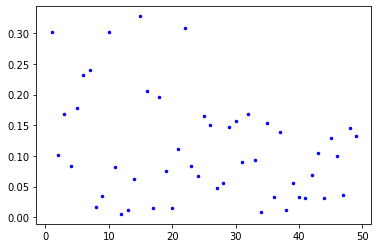

In [63]:
for k in range (1,50):
    plt.plot(k,abs(conv[k]),marker='.', markersize=5, color="blue")
plt.show()

#### Testing the CMAC (Plot is between actual curve vs output points)

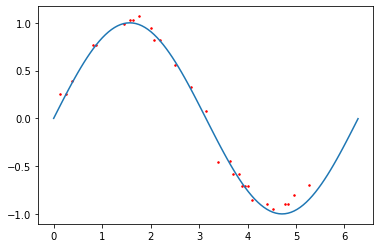

In [40]:
for k in range (1,len(test_data)):
    t = int(np.round((xt_n[k])*35))
    y_output=(w_vector[t-1]+w_vector[t]+w_vector[t+1])
    plt.plot(test_data[k], y_output*2,marker='.', markersize=3, color="red")

plt.plot(x, y)
plt.show()